## REGRESSÃO


In [ ]:
#Importando Blibliotecas
%pip install seaborn==0.11.1

In [90]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulação de dados
import pandas as pd
import numpy as np
from decimal import Decimal
#LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Normalização dos dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV


In [84]:
#Carregar o csv para Dataframe
#utf8/utf16
df = pd.read_csv('cars_train.csv',encoding='utf16', delimiter='\t')

### Análise Exploratória dos Dados

Análise exploratória dos dados: Essa é basicamente a etapa onde a gente dá uma boa olhada nos dados pela primeira vez. Ela nos ajuda 
a entender como os dados estão organizados, <br>
quais tipos de dados estamos lidando e nos dá um vislumbre inicial dos valores nas colunas. <br>
Isso é super útil para detectar coisas como valores ausentes, valores muito extremos, ou se alguma coisa
foi codificada de forma errada nos nossos dados.

In [11]:
# Total de linhas e colunas
df.shape

(29584, 29)

In [12]:
#Primeiras linhas 
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [13]:
#Amostra aleatória
df.sample(5)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
3108,297460065943786419047468351287352996953,15.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2019,2020.0,52474.0,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,93955.500961
17053,94482607782002462451232913579153628712,8.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2017,2018.0,70818.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133865.647834
17635,68316934708074543753306296523939789056,8.0,FORD,KA,1.5 TI-VCT FLEX FREESTYLE AUTOMÁTICO,2020,2020.0,38893.0,Automática,4,...,False,NaN,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,106221.532198
28572,16707863693823331267639521979467019141,12.0,CHERY,TIGGO 8,1.6 TGDI GASOLINA TXS DCT,2021,2022.0,13112.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199584.999069
12010,215585425315879603970815464570494851341,16.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2019,2020.0,55815.0,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,73150.653949


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [15]:
#Percentual de cada categoria

categorical_columns = ['id', 'marca', 'modelo', 'versao', 'cambio', 'tipo', 
                       'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 
                       'estado_vendedor', 'anunciante', 'dono_aceita_troca',
                       'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago',
                       'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda']
for col in categorical_columns:
    print(f'Column: {col}')
    print(df[col].value_counts(normalize=True))
    print()

Column: id
id
300716223898539419613863097469899222392    0.000034
285890682893499494121046105359660467160    0.000034
164151341442204939739633671446766506660    0.000034
104605966898056711399437656393867106581    0.000034
225802387330645423199512943057734533233    0.000034
                                             ...   
51948056493465724900513443742353763328     0.000034
56763651987108516122847468318822603887     0.000034
301609676912075371890494688957843480392    0.000034
31630061149326072384596052351170200337     0.000034
171781413417552881896009715888472310172    0.000034
Name: proportion, Length: 29584, dtype: float64

Column: marca
marca
VOLKSWAGEN       0.155287
CHEVROLET        0.102082
TOYOTA           0.073688
HYUNDAI          0.069058
JEEP             0.067604
FIAT             0.064832
BMW              0.060303
AUDI             0.057396
PEUGEOT          0.056618
HONDA            0.053610
MERCEDES-BENZ    0.038027
FORD             0.035830
MITSUBISHI       0.029137
LAND RO

In [16]:
#Retirada da coluna vazia veiculo_alienado
columns_to_drop = ['veiculo_alienado','elegivel_revisao']
df = df.drop(columns=columns_to_drop)
print(df.shape)

(29584, 27)


### VERIFICAÇÃO DE DADOS FALTANTES

Verificação de dados faltantes: Dados faltantes são um verdadeiro motivo de tristeza quando estamos tentando modelar e analisar dados, porque eles podem distorcer nossos resultados e nos levar<br>
a conclusões erradas. Checar se temos dados faltantes nos permite lidar com eles de maneira adequada - uma abordem é excluir as linhas ou colunas onde eles aparecem, ou talvez preencher<br>
os espaços vazios com algum valor.

In [17]:
#VERIFICAÇÃO DE DADOS FALTANTES
print('TOTAL Null\n')
print(df.isnull().sum(),'\n')
print('TOTAL NA\n')
print(df.isna().sum(),)

TOTAL Null

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
preco                          0
dtype: int64 

TOTAL NA

id                             0
num_fotos                    177
marca 

### HISTOGRAMA: Avaliação da normalidade dos dados

#### Vizualizar Dados

Visualização dos dados: Fazer gráficos dos nossos dados pode nos mostrar padrões, tendências e outliers que talvez a gente não percebesse só olhando as estatísticas básicas. Por exemplo, fazer 
um histograma ou um gráfico de barras pode nos ajudar a entender como as nossas variáveis estão distribuídas e com que frequência determinados valores aparecem.

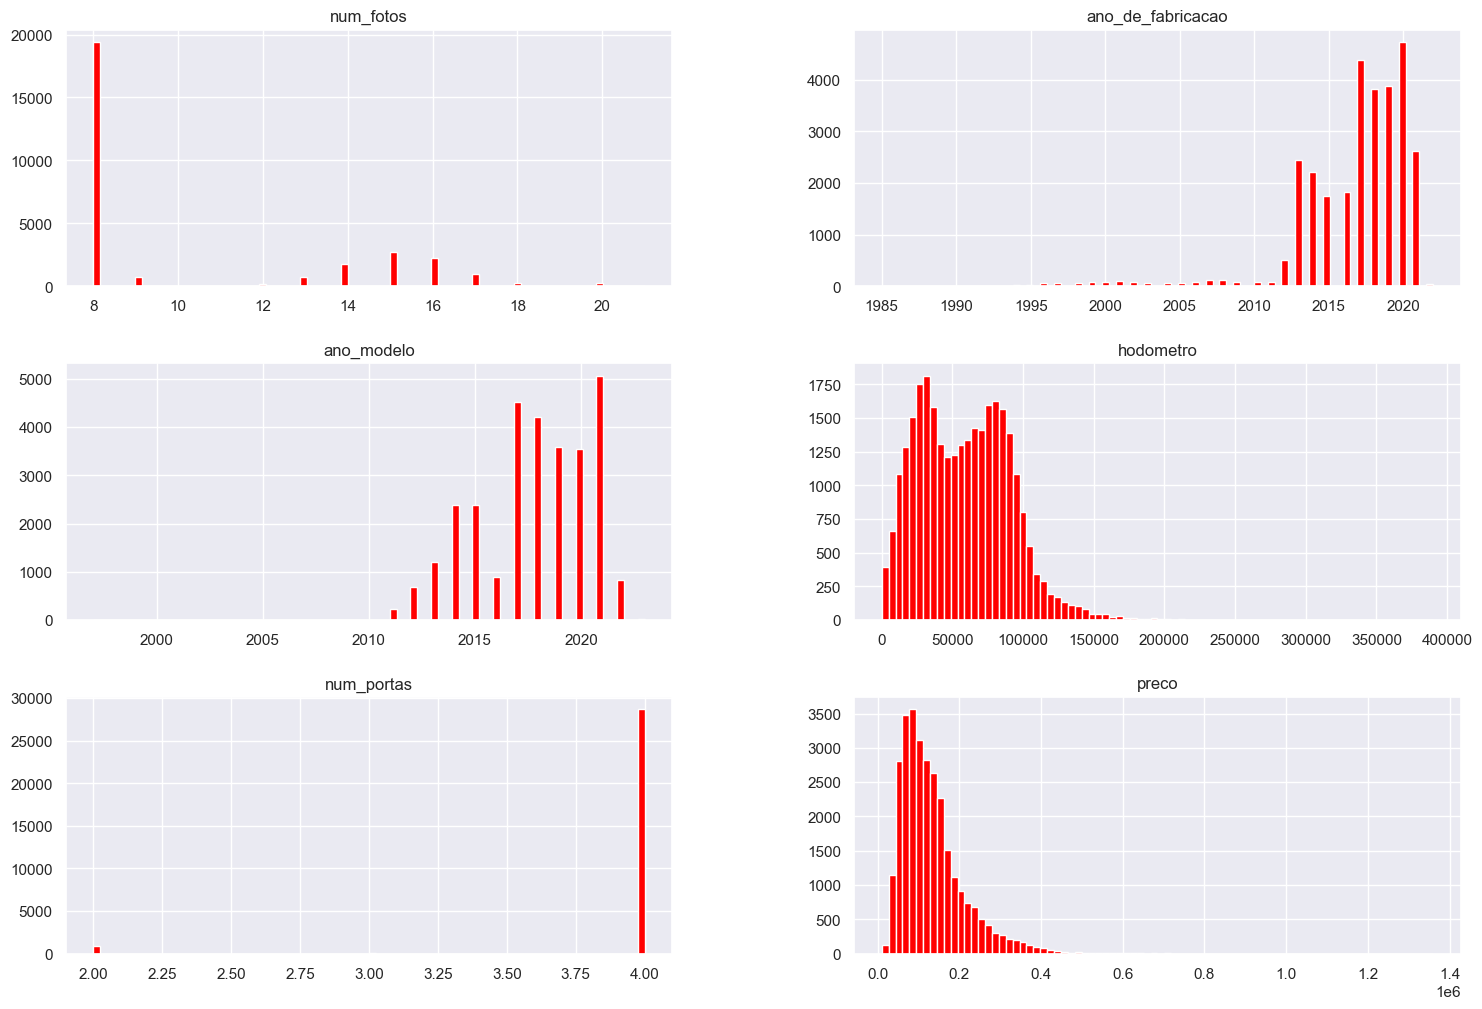

In [18]:
df.hist(bins=80, figsize=(18,12),color="red"); plt.show()

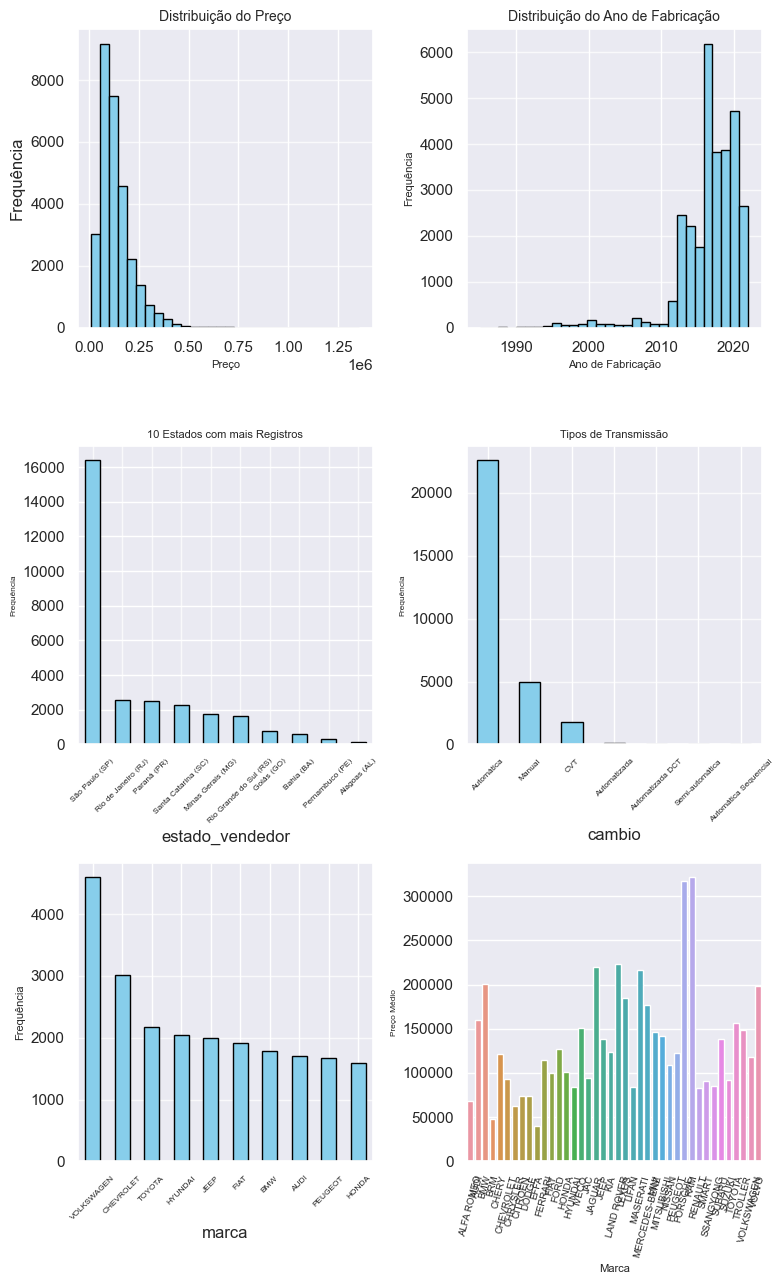

In [19]:
ig, axs = plt.subplots(3, 2, figsize=(8, 13))

axs[0, 0].hist(df['preco'], bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribuição do Preço', fontsize=10)
axs[0, 0].set_xlabel('Preço',fontsize=8)
axs[0, 0].set_ylabel('Frequência')
axs[0, 0].grid(axis='y', alpha=0.75)

axs[0, 1].hist(df['ano_de_fabricacao'], bins=30, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Distribuição do Ano de Fabricação' , fontsize=10)
axs[0, 1].set_xlabel('Ano de Fabricação' , fontsize=8)
axs[0, 1].set_ylabel('Frequência' , fontsize=8)
axs[0, 1].grid(axis='y', alpha=0.75)

top_states = df['estado_vendedor'].value_counts().nlargest(10)
top_states.plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45,fontsize=6)
axs[1, 0].set_title('10 Estados com mais Registros' , fontsize=8)
axs[1, 0].set_ylabel('Frequência' , fontsize=6)
axs[1, 0].grid(axis='x', alpha=0.75)

transmission_counts = df['cambio'].value_counts()
transmission_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, fontsize=6)
axs[1, 1].set_title('Tipos de Transmissão' , fontsize=8)
axs[1, 1].set_ylabel('Frequência', fontsize=6)
axs[1, 1].grid(axis='y', alpha=0.75)

top_brands = df['marca'].value_counts().nlargest(10)
top_brands.plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[2, 0])
axs[2, 0].set_xticklabels(axs[2, 0].get_xticklabels(), rotation=45, fontsize=6)
axs[2, 0].set_ylabel('Frequência', fontsize=8)
axs[2, 0].grid(axis='y', alpha=0.75)

mean_price_by_brand = df.groupby('marca')['preco'].mean()
sns.barplot(x=mean_price_by_brand.index, y=mean_price_by_brand.values, ax=axs[2, 1])
axs[2, 1].set_xticklabels(axs[2, 1].get_xticklabels(), rotation=75, fontsize=7)
axs[2, 1].set_xlabel('Marca', fontsize=8)
axs[2, 1].set_ylabel('Preço Médio', fontsize=6)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Acima podemos ver pelo gráficos a distruição do preço dos carros.<br>
Distribuição do ano de fabricação.<br>
Tipos de transmissão.<br>
Os 10 estados com mais registros de carros.<br>
As 10 marcas mais populares.<br>
E o preço médio por marca<br>

### VERIFICAÇÃO DE HIPÓTESES

Verificação de hipóteses: Essa etapa é onde a gente testa algumas suposições ou ideias que temos sobre os dados. Isso pode nos ajudar a entender como as variáveis estão relacionadas entre si e 
pode nos orientar na escolha de quais modelos usar ou como interpretar os resultados que obtemos.

In [21]:
# Hipótese 1: Carros de marcas populares são mais baratos do que os de outras marcas.
popular_brands = ['VOLKSWAGEN', 'CHEVROLET', 'FORD']
avg_price_popular_brands = df[df['marca'].isin(popular_brands)]['preco'].mean()
avg_price_other_brands = df[~df['marca'].isin(popular_brands)]['preco'].mean()

print("Hipótese 1: Carros de marcas populares são mais baratos do que os de outras marcas")
print(f"Preço médio dos carros de marcas populares: R$ {avg_price_popular_brands:.2f}")
print(f"Preço médio dos carros de outras marcas: R$ {avg_price_other_brands:.2f}\n")

Hipótese 1: Carros de marcas populares são mais baratos do que os de outras marcas
Preço médio dos carros de marcas populares: R$ 110484.65
Preço médio dos carros de outras marcas: R$ 142373.73



In [22]:
# Hipótese 2: Carros com transmissão automática são mais caros do que carros com outros tipos de transmissão.
avg_price_auto = df[df['cambio'] == 'Automática']['preco'].mean()
avg_price_other_trans = df[df['cambio'] != 'Automática']['preco'].mean()

print("Hipótese 2: Carros com transmissão automática são mais caros do que carros com outros tipos de transmissão")
print(f"Preço médio dos carros com transmissão automática: R$ {avg_price_auto:.2f}")
print(f"Preço médio dos carros com outros tipos de transmissão: R$ {avg_price_other_trans:.2f}\n")

Hipótese 2: Carros com transmissão automática são mais caros do que carros com outros tipos de transmissão
Preço médio dos carros com transmissão automática: R$ 146047.76
Preço médio dos carros com outros tipos de transmissão: R$ 91310.10



In [23]:
# Hipótese 3: Carros que ainda estão na garantia de fábrica são mais caros do que aqueles que não estão.
avg_price_warranty = df[df['garantia_de_fábrica'] == 'Garantia de fábrica']['preco'].mean()
avg_price_no_warranty = df[df['garantia_de_fábrica'] != 'Garantia de fábrica']['preco'].mean()

print("Hipótese 3: Carros que ainda estão na garantia de fábrica são mais caros do que aqueles que não estão")
print(f"Preço médio dos carros na garantia de fábrica: R$ {avg_price_warranty:.2f}")
print(f"Preço médio dos carros sem garantia de fábrica: R$ {avg_price_no_warranty:.2f}\n")


Hipótese 3: Carros que ainda estão na garantia de fábrica são mais caros do que aqueles que não estão
Preço médio dos carros na garantia de fábrica: R$ 168993.14
Preço médio dos carros sem garantia de fábrica: R$ 126798.18



### PERGUNTAS DE NEGÓCIO

In [24]:
# Pergunta de negócio 1: Qual é o melhor estado registrado na base de dados para vender um carro de marca popular e por quê?
df_popular_brands = df[df['marca'].isin(popular_brands)]
avg_price_state_popular_brands = df_popular_brands.groupby('estado_vendedor')['preco'].mean()
best_state_to_sell_popular_brand = avg_price_state_popular_brands.idxmax()

print("Pergunta de negócios 1: Qual é o melhor estado registrado na base de dados para vender um carro de marca popular e por quê?")
print(f"Melhor estado para vender carro de marca popular: {best_state_to_sell_popular_brand}\n")

Pergunta de negócios 1: Qual é o melhor estado registrado na base de dados para vender um carro de marca popular e por quê?
Melhor estado para vender carro de marca popular: Sergipe (SE)



Neste caso, o "melhor" estado para vender um carro de marca popular é definido como o estado onde a média de preço desses carros é a mais alta. Sergipe (SE)

In [26]:
# Pergunta de negócio 2: Qual é o melhor estado para comprar uma picape com transmissão automática e por quê?
df_automatic_pickups = df[(df['cambio'] == 'Automática') & (df['tipo'] == 'Picape')]
avg_price_state_automatic_pickups = df_automatic_pickups.groupby('estado_vendedor')['preco'].mean()
best_state_to_buy_automatic_pickup = avg_price_state_automatic_pickups.idxmin()

print("Pergunta de negócios 2: Qual é o melhor estado para comprar uma picape com transmissão automática e por quê?")
print(f"Melhor estado para comprar picape automática: {best_state_to_buy_automatic_pickup}\n")

Pergunta de negócios 2: Qual é o melhor estado para comprar uma picape com transmissão automática e por quê?
Melhor estado para comprar picape automática: Paraíba (PB)



Aqui, o "melhor" estado para comprar uma picape com transmissão automática é definido como o estado onde a média de preço dessas picapes é a mais baixa. 

In [28]:
# Pergunta de negócio 3: Qual é o melhor estado para comprar carros que ainda estão na garantia de fábrica e por quê?
df_warranty = df[df['garantia_de_fábrica'] == 'Garantia de fábrica']
avg_price_state_warranty = df_warranty.groupby('estado_vendedor')['preco'].mean()
best_state_to_buy_warranty = avg_price_state_warranty.idxmin()

print("Pergunta de negócios 3: Qual é o melhor estado para comprar carros que ainda estão na garantia de fábrica e por quê?")
print(f"Melhor estado para comprar carro com garantia de fábrica: {best_state_to_buy_warranty}\n")


Pergunta de negócios 3: Qual é o melhor estado para comprar carros que ainda estão na garantia de fábrica e por quê?
Melhor estado para comprar carro com garantia de fábrica: Paraíba (PB)



Como podemos analisar o "melhor" estado para comprar carros que ainda estão na garantia de fábrica é definido como o estado onde a média de preço desses carros é a mais baixa.

### TRANSFORMANDO CATEGORIAS EM VALORES

O código usa todas as variáveis presentes no conjunto de dados, com algumas transformações aplicadas:
Variáveis categóricas (como 'marca', 'modelo', 'versao', etc.) são transformadas em variáveis numéricas usando LabelEncoder para que possam ser usadas no modelo de aprendizado de máquina. 

O porque dessa escolha foi a compatibilidade com o Modelo: Os modelos de aprendizado de máquina, como regressão linear e floresta aleatória, requerem entradas numéricas.
Como alguns de seus dados são categóricos (por exemplo, marca, modelo, versão), eles precisam ser convertidos em um formato numérico que o modelo possa processar.

Outro ponto foi a preservação do Espaço de Características: O LabelEncoder preserva o número de características, ao contrário do OneHotEncoder, que cria uma nova característica para cada categoria única. 
Isso pode ser útil quando você tem uma variável categórica com muitos valores únicos, pois o OneHotEncoder pode resultar em um grande número de colunas, o que pode tornar o modelo mais 
complexo e propenso a overfitting. <br>

E por ultimo a Facilidade de Uso: O LabelEncoder é fácil de usar e implementar, o que pode ser uma consideração importante, especialmente em projetos maiores ou mais complexos.

In [30]:
# Criar uma cópia do DataFrame original
df_encoded = df.copy()
# Aplicar Label Encoding em todas as colunas categóricas
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df[col])
df = df_encoded

#### Correlação entre as features e a target(preço)

Correlação entre variáveis: Checar a correlação entre as variáveis nos ajuda a ver se há alguma relação linear entre elas. Isso é especialmente útil quando estamos escolhendo quais variáveis incluir
no nosso modelo, porque a gente geralmente quer evitar incluir variáveis que são muito correlacionadas entre si, já que isso pode causar problemas de multicolinearidade.

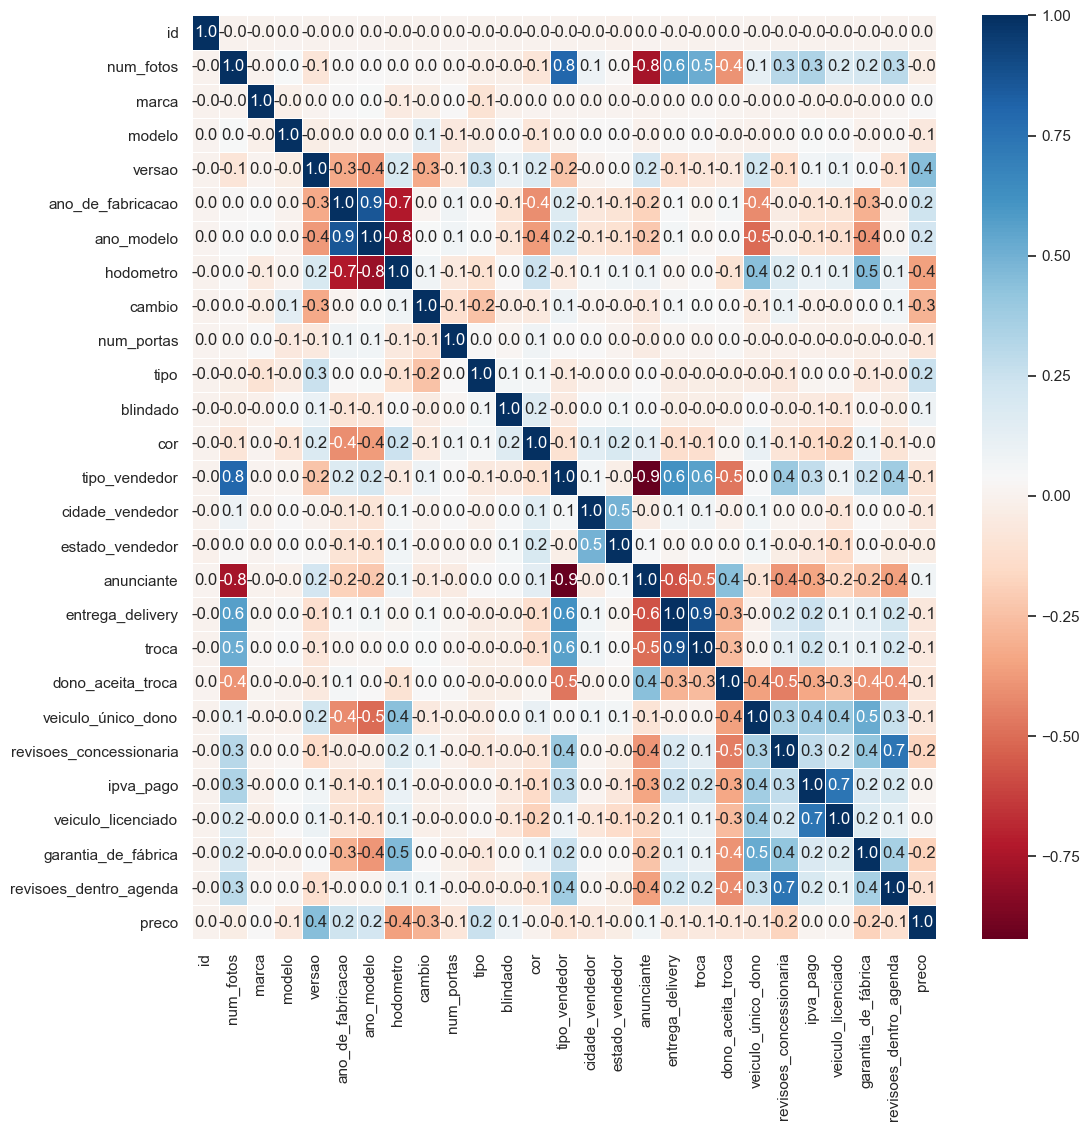

Correlação entre as variáveis e a váriavel alvo:

preco                 1.000000
versao                0.445720
tipo                  0.248755
ano_de_fabricacao     0.239172
ano_modelo            0.214854
blindado              0.087746
anunciante            0.073411
marca                 0.035961
veiculo_licenciado    0.015879
ipva_pago             0.010064
Name: preco, dtype: float64


In [31]:
#CORRELAÇÃO 
plt.figure(figsize=(12,12))
sns.set_theme()
sns.heatmap(df.corr(), annot=True, fmt=".1f",linewidth=.5 ,cmap="RdBu")
plt.show()
# Correlação entre as variáveis e a váriavel alvo
correlation = df.corr()["preco"].sort_values(ascending = False)
print("Correlação entre as variáveis e a váriavel alvo:\n")
print(correlation.head(10))  

In [32]:
#AJUSTE DOS DADOS FALTANTES, RETIRADA DOS DADOS
df.dropna(inplace=True)
df.shape

(29407, 27)

### CRIANDO MODELOS REGRESSÃO LINEAR

Estamos resolvendo um problema de regressão, pois o objetivo é prever um valor contínuo (o preço do carro).

#### Separação dos dados em Treino e Teste

In [34]:
#DADOS DAS VARIÁVEIS INDEPENDENTES
X = df.drop(["preco"], axis = 1)

#DADOS DA VARIÁVEL DEPENDENTE, QUE QUEREMOS ENCONTRAR
y = df["preco"]

#DIVISÃO DO DATA FRAME EM TEST E TREINAMENTO 80% TREINAMENTO E 20% TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=50)

#### Tamanho das Amostras de Treino e Teste

In [35]:
print(f"X_train dimensões {X_train.shape} e tamanho {X_train.size}")
print(f"X_test dimensões {X_test.shape} e tamanho {X_test.size}")
print(f"y_train dimensões {y_train.shape} e tamanho {y_train.size}")
print(f"y_test dimensões {y_test.shape} e tamanho {y_test.size}")

X_train dimensões (23525, 26) e tamanho 611650
X_test dimensões (5882, 26) e tamanho 152932
y_train dimensões (23525,) e tamanho 23525
y_test dimensões (5882,) e tamanho 5882


O modelo RandomForestRegressor foi testado juntamente com outros modelos e baseado na sua performace ele foi escolhido ao final para ser utilizado nos dados de teste. Ele é um modelo de aprendizado de máquina que usa múltiplas árvores de decisão para fazer previsões. 

Prós do RandomForestRegressor:
 - Pode capturar relações não-lineares e interações entre variáveis.
 - Tende a ter um bom desempenho na prática e é bastante flexível.
 - Ele tem recursos para lidar com valores ausentes.

Contras do RandomForestRegressor:
 - Pode ser mais complexo e lento para treinar e fazer previsões do que modelos mais simples, como regressão linear.
 - A saída (previsões de preço) pode ser difícil de interpretar em comparação com modelos mais simples.

### Modelo LinearRegression()

In [36]:
# Criando o modelo LinearRegression()
regLinear = LinearRegression()
# Realizar treinamento do modelo
regLinear.fit(X_train, y_train)
# Realizar predição com os dados separados para teste
pred_regLinear = regLinear.predict(X_test)

##### VISUALIZAÇÃO DOS DADOS

Foram escolhidas três métricas para avaliar a performance do modelo:

1. Mean Absolute Error (MAE): Esta é a média das diferenças absolutas entre as previsões e os valores reais. É uma métrica fácil de entender e útil para problemas de regressão.

2. Mean Squared Error (MSE): Esta é a média dos quadrados das diferenças entre as previsões e os valores reais. É mais sensível a grandes erros (porque eles são elevados ao quadrado) do que o MAE.

3. Coeficiente de determinação (R2): Esta é uma medida estatística que indica o quão bem as previsões do modelo se ajustam aos valores reais. Um valor de R2 de 1 indica que o modelo faz previsões perfeitas.

Essas métricas foram escolhidas porque são comumente usadas em problemas de regressão e fornecem informações úteis sobre o desempenho do modelo.

In [37]:
#intercept
iRG = (regLinear.intercept_)
print("Intercept: "+str(iRG))
# Visualização dos 03 primeiros resultados
print(f'Predição amostra de 3: {pred_regLinear[:3]}')
#Mean absolute error
maeRG = mean_absolute_error(y_test, pred_regLinear)
print('Erro absoluto médio (MAE): %.2f' % maeRG)
#Mean squared error
mRG = mean_squared_error(y_test, pred_regLinear)
print('Erro quadrado médio (MSE): %.2f' % mRG)
# R2
r2RG = r2_score(y_test, pred_regLinear)
print('R2: %.6f' % r2RG)

Intercept: -13435962.085215319
Predição amostra de 3: [ 70825.13702433  88227.84300879 121086.84213743]
Erro absoluto médio (MAE): 42223.96
Erro quadrado médio (MSE): 3375138316.94
R2: 0.476799


##### VALIDAÇÃO DO MODELO 1: CrossValidation

In [38]:
cv_score = np.sqrt(-cross_val_score(regLinear,X_test,pred_regLinear,cv=5,scoring='neg_mean_squared_error'))
cv1RG = cv_score.mean()
cv2RG = cv_score.std()
print("Média: %.6f" %cv1RG)
print("Desvio Padrão: %.6f" %cv2RG)
print("Shape:",pred_regLinear.shape)
print("Scores neg_mean_squared_error: ",cv_score)

Média: 0.000000
Desvio Padrão: 0.000000
Shape: (5882,)
Scores neg_mean_squared_error:  [1.22253980e-08 1.04981753e-08 9.25762390e-09 2.55324872e-08
 1.43433920e-08]


In [39]:
y_test = np.array(y_test)

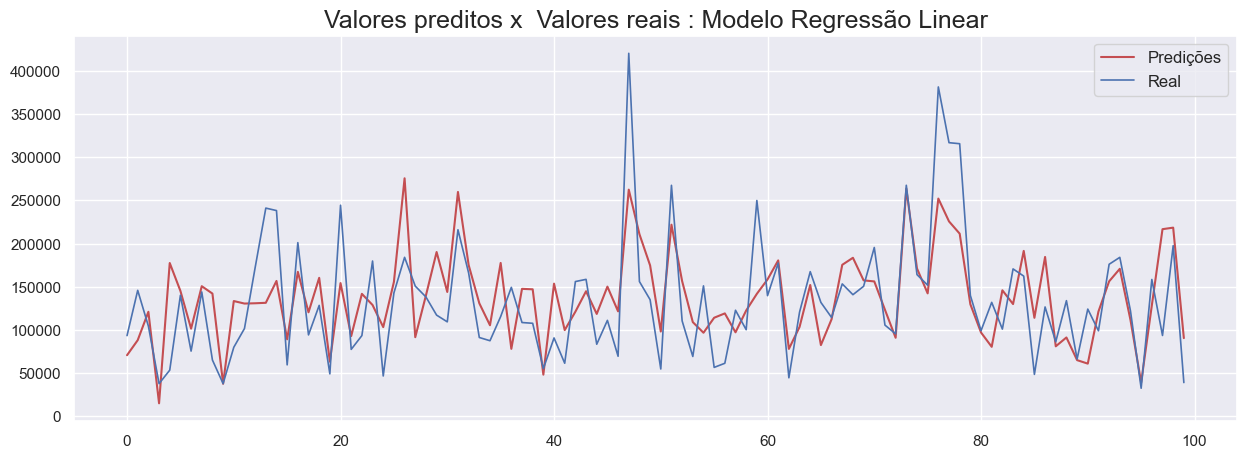

In [40]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(pred_regLinear[:100], linewidth=1.5, color='r')
plt.plot(y_test[:100], linewidth=1.2,color='b')
plt.title('Valores preditos x  Valores reais : Modelo Regressão Linear',size=18)
plt.legend(['Predições','Real'],fontsize=12)
plt.show()

### Modelo LinearRegression() com dados normalizados StandardScaler()

In [41]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [88]:
rLinear = LinearRegression()

rLinear.fit(X_train_scaler,y_train)

y_pred_scaler = rLinear.predict(X_test_scaler)

#### VISUALIZANDO OS RESULTADOS

In [43]:
#intercept
iRL = (rLinear.intercept_)
print("Intercept: "+str(iRL))
# Visualização dos 03 primeiros resultados
print(f'Predição amostra de 3: {y_pred_scaler[:3]}')
#Mean absolute error
maeRL = mean_absolute_error(y_test, pred_regLinear)
print('Erro absoluto médio (MAE): %.2f' % maeRL)
#Mean squared error
mRL = mean_squared_error(y_test, y_pred_scaler)
print('Erro quadrado médio (MSE): %.2f' % mRL)
# R2
r2RL = r2_score(y_test, y_pred_scaler)
print('R2: %.6f' % r2RL)

Intercept: 132727.0127067393
Predição amostra de 3: [ 70825.13702433  88227.8430088  121086.84213743]
Erro absoluto médio (MAE): 42223.96
Erro quadrado médio (MSE): 3375138316.94
R2: 0.476799


##### VALIDAÇÃO DO MODELO 2: CrossValidation

In [44]:
cv_score = np.sqrt(-cross_val_score(rLinear,X_test_scaler,y_pred_scaler,cv=5,scoring='neg_mean_squared_error'))
cv1RL = cv_score.mean()
cv2RL = cv_score.std()
print("Média: %.6f" %cv1RL)
print("Desvio Padrão: %.6f" %cv2RL)
print("Shape:",pred_regLinear.shape)
print("Scores neg_mean_squared_error: ",cv_score)

Média: 0.000000
Desvio Padrão: 0.000000
Shape: (5882,)
Scores neg_mean_squared_error:  [8.19654282e-11 7.31750421e-11 6.20846527e-11 4.51680613e-11
 1.04675060e-10]


In [45]:
y_test = np.array(y_test)

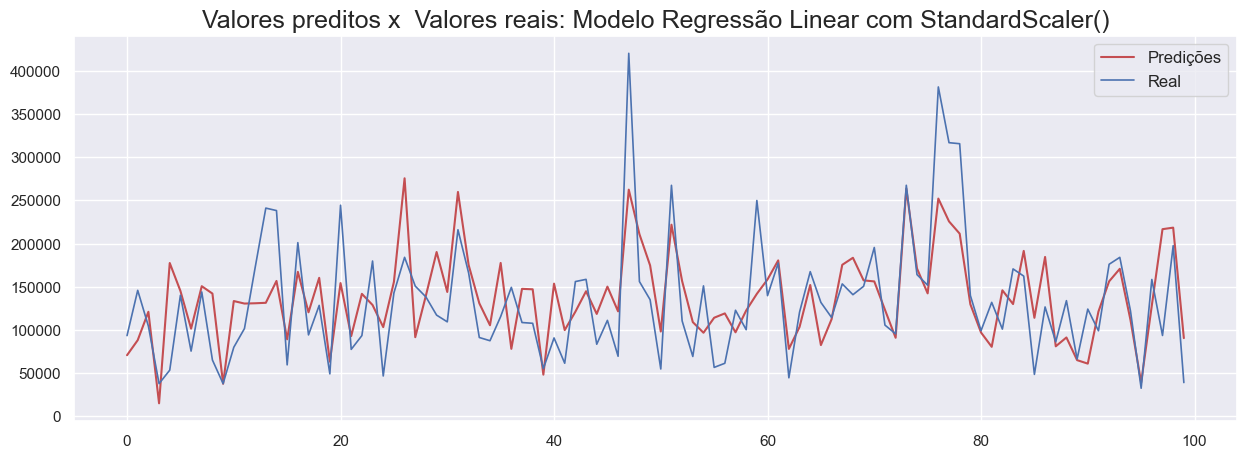

In [46]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(y_pred_scaler[:100], linewidth=1.5, color='r')
plt.plot(y_test[:100], linewidth=1.2,color='b')
plt.title('Valores preditos x  Valores reais: Modelo Regressão Linear com StandardScaler()',size=18)
plt.legend(['Predições','Real'],fontsize=12)
plt.show()

### Modelo LinearRegression() com dados normalizados PolynomialFeatures()


In [47]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [48]:
# Inicializa a regressão linear
rLinear_poly = LinearRegression()
# Ajusta o modelo aos dados de treinamento (aprende os coeficientes)
rLinear_poly.fit(X_train_poly,y_train)
# Faz previsões nos dados de teste
y_pred_poly = rLinear_poly.predict(X_test_poly)

#### VISUALIZANDO OS RESULTADOS

In [49]:
#intercept
iRLpoly = (rLinear_poly.intercept_)
print("Intercept: "+str(iRLpoly))
# Visualização dos 03 primeiros resultados
print(f'Predição amostra de 3: {y_pred_poly[:3]}')
#Mean absolute error
maeRLpoly = mean_absolute_error(y_test, y_pred_poly)
print('Erro absoluto médio: %.2f' % maeRLpoly)
#Mean squared error
mRLpoly = mean_squared_error(y_test, y_pred_poly)
print('Erro quadrado médio: %.2f' % mRLpoly)
# R2
r2RLpoly = r2_score(y_test, y_pred_poly)
print('R2: %.6f' % r2RLpoly)

Intercept: -3002364853.1670322
Predição amostra de 3: [ 86454.09788752 110503.46174574 127125.45682478]
Erro absoluto médio: 36124.52
Erro quadrado médio: 2668560848.60
R2: 0.586330


##### VALIDAÇÃO DO MODELO 3: CrossValidation

In [50]:
cv_score = np.sqrt(-cross_val_score(rLinear_poly,X_test_poly,y_pred_poly,cv=5,scoring='neg_mean_squared_error'))
cv1RLpoly = cv_score.mean()
cv2RLpoly = cv_score.std()
print("Média: %.6f" %cv1RLpoly)
print("Desvio Padrão: %.6f" %cv2RLpoly)
print("Shape:",y_pred_poly.shape)
print("Scores: ",cv_score)

Média: 10916.108722
Desvio Padrão: 9453.850674
Shape: (5882,)
Scores:  [  919.88016154 13514.08685204 28020.96748659  6571.2684371
  5554.34067403]


In [51]:
y_pred_poly = np.array(y_pred_poly)
y_test = np.array(y_test)

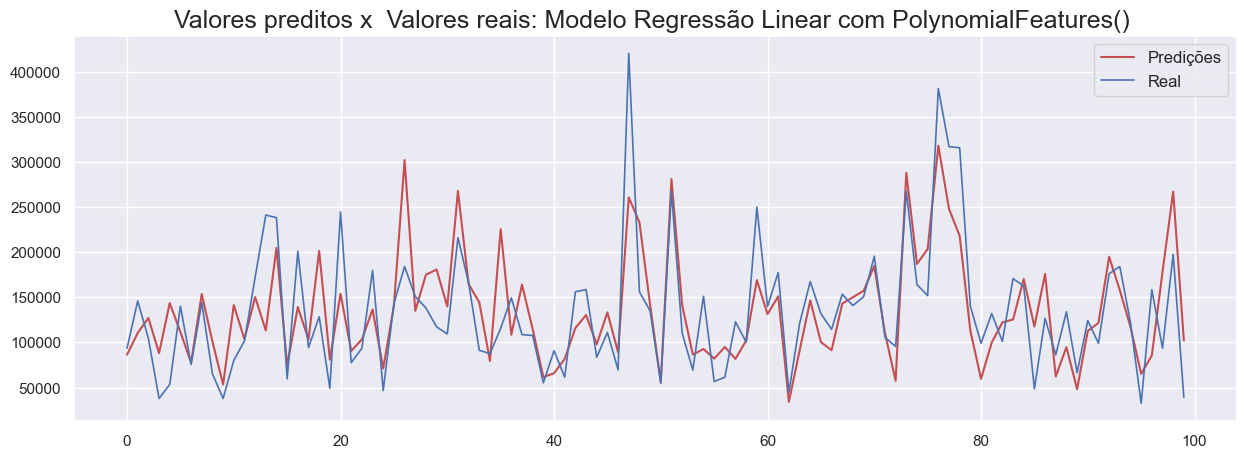

In [52]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(y_pred_poly[:100], linewidth=1.5, color='r')
plt.plot(y_test[:100], linewidth=1.2,color='b')
plt.title('Valores preditos x  Valores reais: Modelo Regressão Linear com PolynomialFeatures() ',size=18)
plt.legend(['Predições','Real'],fontsize=12)
plt.show()

### Modelo RandomForestRegressor()

In [91]:
# Definir os hiperparâmetros que serão ajustados
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Inicializar o RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=10)

# Inicializar o GridSearchCV com o modelo, os hiperparâmetros e a métrica de avaliação
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, scoring='r2', cv=5)

# Ajustar o GridSearchCV aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Obter o melhor modelo encontrado
best_model = grid_search.best_estimator_

# Avaliar o desempenho do melhor modelo nos dados de teste
best_model_score = best_model.score(X_test, y_test)
print("R2 do melhor modelo:", best_model_score)

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
R2 do melhor modelo: 0.7410173892107056


Foi feito um Ajuste de Hiperparâmetros utilizando grid search para encontrar esses parâmetros utilizados abaixo.

In [53]:
forest_reg = RandomForestRegressor(max_depth= None, min_samples_split= 10, n_estimators= 300,random_state=10)
forest_reg.fit(X_train , y_train)
y_pred_forest = forest_reg.predict(X_test)

In [55]:
#intercept
#não possui intercepr
iRF = 0
# Visualização dos 03 primeiros resultados
print(f'Predição amostra de 3: {y_pred_forest[:3]}')
#Mean absolute error
maeRF = mean_absolute_error(y_test, y_pred_forest)
print('Erro absoluto médio (MAE): %.2f' % maeRF)
#Mean squared error
mRF = mean_squared_error(y_test, y_pred_forest)
print('Erro quadrado médio (MSE): %.2f' % mRF)
# R2
r2RF = r2_score(y_test, y_pred_forest)
print('R2: %.6f' % r2RF)


Predição amostra de 3: [ 99642.44243224  99891.17074379 140508.76897237]
Erro absoluto médio (MAE): 27038.67
Erro quadrado médio (MSE): 1670682626.33
R2: 0.741017


##### VALIDAÇÃO DO MODELO 4: CrossValidation

In [56]:
cv_score = np.sqrt(-cross_val_score(forest_reg,X_test,y_pred_forest,cv=5,scoring='neg_mean_squared_error'))
cv1RF = cv_score.mean()
cv2RF = cv_score.std()
print("Média: %.6f" %cv1RF)
print("Desvio Padrão: %.6f" %cv2RF)
print("Shape:",y_pred_forest.shape)
print("Scores: ",cv_score)

Média: 16589.173075
Desvio Padrão: 1047.649729
Shape: (5882,)
Scores:  [17598.304064   18055.43595039 15360.13253906 15838.83773351
 16093.15508979]


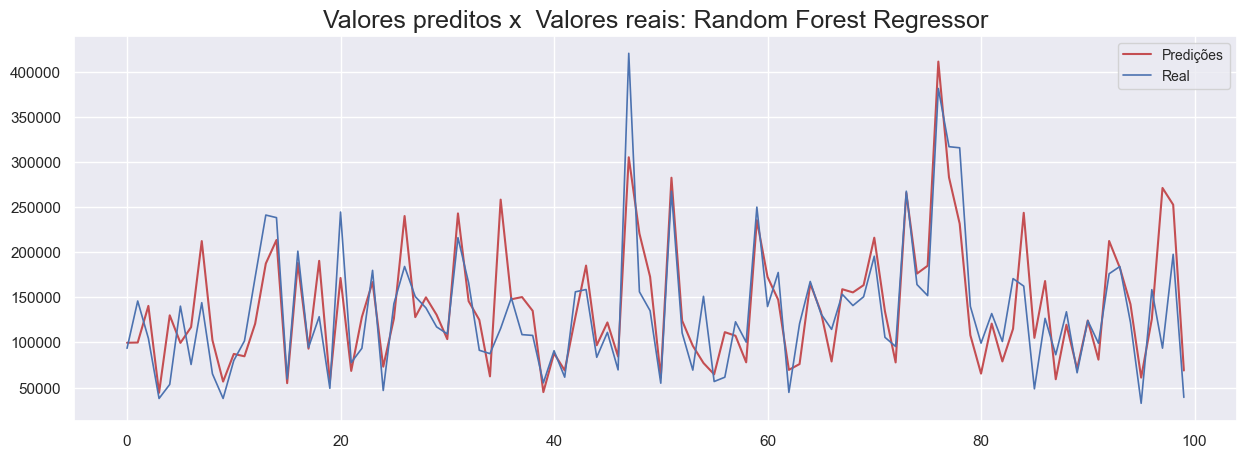

In [57]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(y_pred_forest[:100], linewidth=1.5, color='r')
plt.plot(y_test[:100], linewidth=1.2,color='b')
plt.title('Valores preditos x  Valores reais: Random Forest Regressor',size=18)
plt.legend(['Predições','Real'],fontsize=10)
plt.show()

### COMPARAÇÃO DOS RESULTADOS

In [58]:
#RESULTADOS
models = ['LinearRegression()', 'LR/StandardScaler()', 'LR/PolynomialFeatures()', 'RandomForestRegressor()']
intercept = [iRG, iRL, iRLpoly, iRF]
r2 = [r2RG, r2RL, r2RLpoly,r2RF]
MSE = [mRG, mRL, mRLpoly, mRF]
MAE = [maeRG, maeRL, maeRLpoly, maeRF]
cvMean = [cv1RG, cv1RL, cv1RLpoly, cv1RF ]
cvStd = [cv2RG, cv2RL, cv2RLpoly, cv2RF]

In [59]:
df_comp = pd.DataFrame(list(zip(models,intercept,r2,MSE,MAE,cvMean,cvStd )), columns=['Models', 'intercept', 'R2','MSE', 'MAE', 'cvMean','cvStd'])

In [60]:
df_comp['intercept'] = df_comp['intercept'].map(lambda x: "{:.2f}".format(x))
df_comp['R2'] = df_comp['R2'].map(lambda x: round(x,4))
df_comp['MSE'] = df_comp['MSE'].map(lambda x: "{:.2f}".format(x))
df_comp['MAE'] = df_comp['MAE'].map(lambda x: round(x,2))
df_comp['cvMean'] = df_comp['cvMean'].map(lambda x: round(x,2))
df_comp['cvStd'] = df_comp['cvStd'].map(lambda x: round(x,2))

In [61]:
df_comp

,Models,intercept,R2,MSE,MAE,cvMean,cvStd
0,LinearRegression(),-13435962.09,0.4768,3375138316.94,42223.96,0.00,0.00
1,LR/StandardScaler(),132727.01,0.4768,3375138316.94,42223.96,0.00,0.00
2,LR/PolynomialFeatures(),-3002364853.17,0.5863,2668560848.60,36124.52,10916.11,9453.85
3,RandomForestRegressor(),0.00,0.7410,1670682626.33,27038.67,16589.17,1047.65


#### Com base nos modelos aplicados, o modelo que tem os melhores resultados foi a RandomForestRegressor. 
#### Neste modelo não foram ajustadas as variáveis com StandardScaler ou PolynomialFeatures. 

#### O R2 foi 74.10%  # Média valor das casas R$ 16,589.17 
#### Desvio Padrão da média do valor das casas R$ 1,047.65
#### Erro quadrado médio MSE  foi R$ 1,670,682,626.33
#### Erro quadrado absoluto (MAE) foi R$ 27,038.67

A previsão do preço é feita utilizando o modelo RandomForestRegressor que foi treinado com os dados de treinamento. Os passos são os seguintes:
1. Os dados são carregados e processados (dados ausentes são tratados, variáveis categóricas são codificadas).
2. Os dados são divididos em variáveis independentes (X) e variável dependente (y - preço).
3. Os dados são divididos em conjuntos de treinamento e teste.
4. O modelo RandomForestRegressor é treinado usando o conjunto de treinamento.
5. O modelo treinado é usado para prever os preços dos carros no conjunto de teste.
6. As previsões são então salvas em um arquivo CSV para futura avaliação.

### GERANDO ARQUIVO PREDICTED

In [83]:
# Carregar os dados de teste para a predição do csv de teste
print("Carregando os dados de teste...")
#utf8/utf16
df_test = pd.read_csv('cars_test.csv', encoding='utf16', delimiter='\t')

#Retirada da coluna vazia veiculo_alienado e elegivel_revisao
columns_to_drop = ['veiculo_alienado','elegivel_revisao']
df_test = df_test.drop(columns=columns_to_drop)

# Transformar as colunas categóricas
print("Transformando as colunas categóricas...")
categorical_columns = ['id', 'marca', 'modelo', 'versao', 'cambio', 'tipo', 
                        'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 
                        'estado_vendedor', 'anunciante', 'dono_aceita_troca',
                        'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago',
                        'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda']
# Criar uma cópia do DataFrame original
df_encoded = df_test.copy()
# Aplicar Label Encoding em todas as colunas categóricas
label_encoder = LabelEncoder()
try:
    for col in categorical_columns:
        df_encoded[col] = label_encoder.fit_transform(df_test[col])
except:
    pass

df_test = df_encoded

# Lidar com valores ausentes nos dados
print("Lidando com valores ausentes...")
df_test.dropna(inplace=True)


# Agora podemos fazer previsões com o modelo
print("Fazendo previsões...")
y_pred = forest_reg.predict(df_test)

# Criar um novo DataFrame com os IDs e os preços previstos
print("Criando o DataFrame de previsões...")
predictions = pd.DataFrame({'id': df_test['id'], 'preco': y_pred})

# Salvar as previsões em um arquivo CSV
print("Salvando as previsões em um arquivo CSV...")
predictions.to_csv('predicted.csv', index=False)

print("Previsões concluídas!")

Carregando os dados de teste...
Transformando as colunas categóricas...
Lidando com valores ausentes...
Fazendo previsões...
Criando o DataFrame de previsões...
Salvando as previsões em um arquivo CSV...
Previsões concluídas!
